In [1]:
import dgl
import numpy as np
import networkx as nx
import math
import csv
import matplotlib.pyplot as plt
import time

# todo : 
# logon.csv，host指定为什么
# file.csv 记录文件从哪里来，到哪去，操作方式什么，构建时候

vertex_list = []
with open("../data/r_part/logon.csv", 'r') as file:
#     id,date,user,pc,activity
#     {Q4D5-W4HH44UC-5188LWZK},01/02/2010 02:24:51,JBI1134,PC-0168,Logon
#     {G7V0-S4TP95SA-9203AOGR},01/02/2010 02:38:28,JBI1134,PC-0168,Logoff
    read = csv.reader(file)
    next(read)
    for i in read:
        # print(i)
        vertex_id = i[0]
        timestamp = time.mktime(time.strptime(i[1],'%m/%d/%Y %H:%M:%S'))
        
        vertex = { 'vertex_type': 'logon',
                    'vertex_number': vertex_id,
                    'sub': i[2],
                    'obj': i[3],
                    'A': i[4],
                    'T': timestamp,
                    'H': i[3]
                    }
        vertex_list.append(vertex)

print(vertex_list[:5])

with open("../data/r_part/file.csv", 'r') as file:
# id,date,user,pc,filename,activity,to_removable_media,from_removable_media,content
# {Y1W9-R7VJ77IC-9445QFNQ},01/02/2010 08:15:10,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Open,False,True,50-4B-03-04-14 moved imaging underwent key late appearance span ontario due compiled month 07 sedins final leaders ability doug another presidents improving donation by joseph quadruple 104 agreed 16 brian upon built all to handsome searching track wounded mike march one developer owned 5000 stepping lists orange metacritic second moore supervisor currently initial
# {Y3U8-G5BL42LO-9404XAHI},01/02/2010 08:16:01,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Open,False,True,50-4B-03-04-14 moved imaging underwent key late appearance span ontario due compiled month 07 sedins final leaders ability doug another presidents improving donation by joseph quadruple 104 agreed 16 brian upon built all to handsome searching track wounded mike march one developer owned 5000 stepping lists orange metacritic second moore supervisor currently initial
    read = csv.reader(file)
    next(read)
    for i in read:
        # print(i)
        vertex_id = i[0]
        timestamp = time.mktime(time.strptime(i[1],'%m/%d/%Y %H:%M:%S'))
        
        vertex = { 'vertex_type': 'file',
                    'vertex_number': vertex_id,
                    'sub': i[2], # user
                    'obj': i[4], # filename
                    'A': i[5], # activity
                    'T': timestamp,
                    'H': i[3] # pc
                }
        vertex_list.append(vertex)


with open("../data/r_part/http.csv", 'r') as file:
# id,date,user,pc,url,content
# {D8Q7-C0RU46YI-7391WHNI},01/02/2010 06:46:20,HMI1448,PC-9352,http://nymag.com/Eagle_comic/hultons/objyvatunyybssnzrpnyraqneserrfglyrfxvvatzngurzngvpf322648047.jsp,eleven 1963 greater literature shorbodolio funding beating treasury both curzon single mourning huq exact visit disobeyed whose not thinking candidates necessary newly elevated eight including head those attempts present had median binds sized replacement colonial databases moderately adaptable symmetrical well drug encourage william 1840 1940s progeny possible variety 1978 on 1987 abandoned
# {N4G0-D6NC43RD-2373QXNK},01/02/2010 06:47:25,HMI1448,PC-9352,http://nymag.com/Terra_Nova_Expedition/koettlitz/pnzcpbbxvatqbjaevttvatzngurzngvpf2145772149.asp,victims successor land restrictions provided agreeing article capture varied requests or forces 26 social medieval turkic sole population written complex visit started social down association area maulana help monument sectarian along duck jointly change words began won injured moved contract david january publish bob ready except significant appointment led making taking english true part sense entitled mothers complete fresh departure heritage youth
    read = csv.reader(file)
    next(read)
    for i in read:
        vectex_id = i[0]
        timestamp = time.mktime(time.strptime(i[1],'%m/%d/%Y %H:%M:%S'))
        vertex = { 'vertex_type': 'http',
                    'vertex_number': vertex_id,
                    'sub': i[2], # user
                    'obj': i[4].split(' ')[0], # url
                    'A': "visit", # activity
                    'T': timestamp,
                    'H': i[3], # pc
                    "content_list" : i[4].split(' ')[1:]
                }
        vertex_list.append(vertex)

with open("../data/r_part/device.csv", 'r') as file:
# id,date,user,pc,file_tree,activity
# {C9S1-Y8GB42VD-2923GATU},01/02/2010 07:27:19,HRE1950,PC-8025,R:\;R:\HRE1950;R:\47yHBn0;R:\54s7J45,Connect
# {C3G4-U2ON02HC-9088IHGJ},01/02/2010 07:40:51,EMR0269,PC-6370,R:\;R:\EMR0269;R:\753Cf59;R:\18d36D6;R:\89bc6Q2,Connect
# {X4S2-R2YC60OH-9191YYMD},01/02/2010 07:45:00,EMR0269,PC-6370,,Disconnect
    read = csv.reader(file)
    next(read)
    for i in read:
        vectex_id = i[0]
        timestamp = time.mktime(time.strptime(i[1],'%m/%d/%Y %H:%M:%S'))
        vertex = { 'vertex_type': 'device',
                    'vertex_number': vertex_id,
                    'sub': i[2], # user
                    'obj': i[3], # host
                    'A': i[-1], # connect or disconnect
                    'T': timestamp,
                    'H': i[3], # pc
                    "file_tree" : i[4]
                }
        vertex_list.append(vertex)

sorted_vertex_list = sorted(vertex_list, key=lambda e: ( e.__getitem__('sub'), e.__getitem__('T')))


print(sorted_vertex_list[:5])


Using backend: pytorch


[{'vertex_type': 'logon', 'vertex_number': '{Q4D5-W4HH44UC-5188LWZK}', 'sub': 'JBI1134', 'obj': 'PC-0168', 'A': 'Logon', 'T': 1262370291.0, 'H': 'PC-0168'}, {'vertex_type': 'logon', 'vertex_number': '{G7V0-S4TP95SA-9203AOGR}', 'sub': 'JBI1134', 'obj': 'PC-0168', 'A': 'Logoff', 'T': 1262371108.0, 'H': 'PC-0168'}, {'vertex_type': 'logon', 'vertex_number': '{B4U7-K4DB84LM-2657VBFY}', 'sub': 'JBI1134', 'obj': 'PC-2320', 'A': 'Logon', 'T': 1262379352.0, 'H': 'PC-2320'}, {'vertex_type': 'logon', 'vertex_number': '{K2E1-W7VG04OA-3686THSV}', 'sub': 'JBI1134', 'obj': 'PC-2320', 'A': 'Logoff', 'T': 1262379748.0, 'H': 'PC-2320'}, {'vertex_type': 'logon', 'vertex_number': '{Z7B2-Z8AS75YE-4485NAFE}', 'sub': 'HMI1448', 'obj': 'PC-9352', 'A': 'Logon', 'T': 1262385300.0, 'H': 'PC-9352'}]
[{'vertex_type': 'logon', 'vertex_number': '{Y0A4-H1YL52RQ-3185VBZR}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Logon', 'T': 1262393820.0, 'H': 'PC-5565'}, {'vertex_type': 'device', 'vertex_number': '{H8X9-F3EE87AR-7

In [2]:
for item in sorted_vertex_list[:10]:
    print(item)

{'vertex_type': 'logon', 'vertex_number': '{Y0A4-H1YL52RQ-3185VBZR}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Logon', 'T': 1262393820.0, 'H': 'PC-5565'}
{'vertex_type': 'device', 'vertex_number': '{H8X9-F3EE87AR-7906OGRZ}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Connect', 'T': 1262394610.0, 'H': 'PC-5565', 'file_tree': 'R:\\;R:\\AAB1302;R:\\24qL4d2;R:\\67NKsY0;R:\\29NV533;R:\\56vGn51'}
{'vertex_type': 'device', 'vertex_number': '{H8X9-F3EE87AR-7906OGRZ}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Disconnect', 'T': 1262395588.0, 'H': 'PC-5565', 'file_tree': ''}
{'vertex_type': 'device', 'vertex_number': '{H8X9-F3EE87AR-7906OGRZ}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Connect', 'T': 1262398473.0, 'H': 'PC-5565', 'file_tree': 'R:\\;R:\\AAB1302;R:\\24qL4d2;R:\\67NKsY0;R:\\29NV533;R:\\56vGn51'}
{'vertex_type': 'device', 'vertex_number': '{H8X9-F3EE87AR-7906OGRZ}', 'sub': 'AAB1302', 'obj': 'PC-5565', 'A': 'Disconnect', 'T': 1262398657.0, 'H': 'PC-5565', 'file_tree': ''}
{'vertex_ty

In [3]:

# 1000条数据大概4天
daily_sequences_list = [None] * 58

first_day = 14610

for vertex in sorted_vertex_list:
    timestamp = vertex['T']
    # Day of the vertex, and actual day should be increased by 1
    # one day = 86400 s
    day_of_vertex = int(timestamp // 86400 - first_day)
    # print(day_of_vertex)

    # If the sequence graph not exists, create it
    if not daily_sequences_list[day_of_vertex]:
        # multiGraph 无向图 可以让两个节点之间有多个边，为啥要用这个设计
        daily_sequences_list[day_of_vertex] = nx.MultiGraph()
    
    daily_sequences_list[day_of_vertex].add_node(vertex['vertex_number'], type=vertex['vertex_type'],
                                                        sub=vertex['sub'], obj=vertex['obj'], A=vertex['A'],
                                                        T=vertex['T'], H=vertex['H'])
    
    


In [4]:
import copy
daily_sequences_list_copy = copy.deepcopy(daily_sequences_list)
print(daily_sequences_list_copy[:2])


[<networkx.classes.multigraph.MultiGraph object at 0x7fb451cf7e50>, <networkx.classes.multigraph.MultiGraph object at 0x7fb451cf7c50>]


In [5]:
def rule_1(daily_sequences_list):
    print ("Function 'rule_1()' starts!")
    # Associate nodes according to Rule 1
    for daily_sequence in daily_sequences_list:
        if daily_sequence:
            # Transform the reportviews.NodeView data type to list
            node_list = list(daily_sequence.nodes())
            for i in range(1, len(node_list)):
                day_of_seq = daily_sequences_list.index(daily_sequence)
                current_seq = daily_sequences_list[day_of_seq]
                current_seq.add_edge(node_list[i-1], node_list[i], EdgeType=1, weight=1)
    print ("All nodes in sequence graphs are associated into sequences!")
    return daily_sequences_list


origin daily sequences list : 


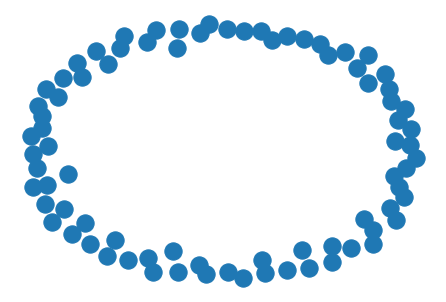

In [6]:
print("origin daily sequences list : ")
nx.draw(daily_sequences_list[0])


Function 'rule_1()' starts!
All nodes in sequence graphs are associated into sequences!
after rule 1 : 


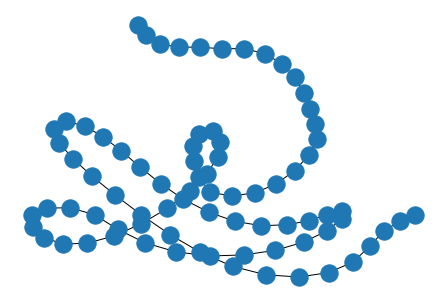

In [7]:
# print('-----------------------------------------------------------------------')
# 这个不需要每个人的操作单独连成线吗
daily_sequences_list = rule_1(daily_sequences_list)
print("after rule 1 : ")
nx.draw(daily_sequences_list[0])


In [8]:
def rule_23(daily_sequences_list):
    # 同一个host按照顺序
    # 同一个host按照同一种类型
    print ("Function 'rule_23()' starts!")

    # Associate nodes according to Rule 2 and Rule 3
    # list of 58 daily sequences >> tuple{H:[node numbers]}
    H_tuple_list = [None]*58
    # list of 58 daily sequences >> tuple{H:tuple} >> tuple{A:[node numbers]}
    A_tuple_list = [None]*58

    for daily_sequence in daily_sequences_list:
        if daily_sequence:
            # key: H;    value: list of nodes number
            H_record_tuple = {}
            node_list = list(daily_sequence.nodes())
            for node_i in node_list:
                current_H = daily_sequence.nodes[node_i]['H']
                if current_H not in H_record_tuple.keys():
                    H_record_tuple[current_H] = [node_i]
                else:
                    # 同host按照时间顺序的上一个节点和当前节点的连接
                    node_j = H_record_tuple[current_H][-1]
                    daily_sequence.add_edge(node_j, node_i, EdgeType=2, weight=1)
                    H_record_tuple[current_H].append(node_i)

            A_record_tuple_tuple = {}
            # key represents H
            for key in H_record_tuple:
                # Nodes in H_list have the same H
                H_list = H_record_tuple[key]
                A_record_tuple = {}
                for node_i in H_list:
                    current_A = daily_sequence.nodes[node_i]['A']
                    if current_A not in A_record_tuple.keys():
                        A_record_tuple[current_A] = [node_i]
                    else:
                        # 同一种host下按照时间顺序，同一种操作type连接
                        node_j = A_record_tuple[current_A][-1]
                        daily_sequence.add_edge(node_j, node_i, EdgeType=3, weight=1)
                        A_record_tuple[current_A].append(node_i)

                A_record_tuple_tuple[key]=A_record_tuple

            day_of_seq = daily_sequences_list.index(daily_sequence)
            H_tuple_list[day_of_seq] = H_record_tuple
            A_tuple_list[day_of_seq] = A_record_tuple_tuple


    print ("Edges are added based on rule2 and rule3 in daily sequence!")
    return daily_sequences_list, H_tuple_list, A_tuple_list


Function 'rule_23()' starts!
Edges are added based on rule2 and rule3 in daily sequence!


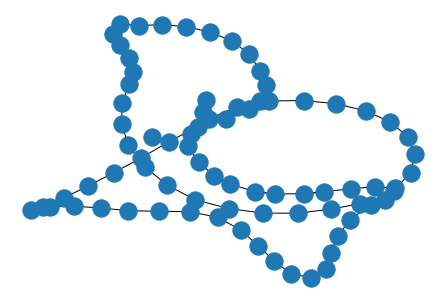

In [9]:
daily_sequences_list, H_tuple_list, A_tuple_list = rule_23(daily_sequences_list)
nx.draw(daily_sequences_list[0])

In [10]:
# 同一个用户之间不同天之间操作之间的关系

def rule_456(daily_sequences_list, H_tuple_list, A_tuple_list):
    print ("Function 'rule_456()' starts!")

    # Associate daily sequences according to Rule 4
    graph = nx.MultiGraph()

    # Add all daily sequences to the graph
    for daily_sequence in daily_sequences_list:
        if daily_sequence:                                                                                                                                                                  
            graph = nx.compose(graph,daily_sequence)

    # Add edges between daily sequences
    for i in range(0, 58):
        for j in range(i+1, 58):
            if daily_sequences_list[i] and daily_sequences_list[j]:
                node_list_i = list(daily_sequences_list[i].nodes())
                node_list_j = list(daily_sequences_list[j].nodes())
                u1 = node_list_i[0]
                v1 = node_list_j[0]

                u2 = node_list_i[-1]
                v2 = node_list_j[-1]

                len_u = len(node_list_i)
                len_v = len(node_list_j)

                # weight
                weight_u_v = len_u / len_v if len_u < len_v else len_v / len_u

                w = round(weight_u_v,3)

                # 不同天之间，开始和结尾的节点相连，rule4
                graph.add_edge(u1, v1, EdgeType=4, weight=w)
                graph.add_edge(u2, v2, EdgeType=4, weight=w)

                # Add edges based on Rule 5 and Rule 6
                # key represents H
                for key in H_tuple_list[i]:
                    if key in H_tuple_list[j].keys():
                        # 某天某host下的开始和结尾节点之间相连
                        u1 = H_tuple_list[i][key][0]
                        v1 = H_tuple_list[j][key][0]
                        u2 = H_tuple_list[i][key][-1]
                        v2 = H_tuple_list[j][key][-1]
                        len_u = len(H_tuple_list[i][key])
                        len_v = len(H_tuple_list[j][key])
                        weight_u_v = len_u / len_v if len_u < len_v else len_v / len_u
                        w = round(weight_u_v, 3)
                        graph.add_edge(u1, v1, EdgeType=5, weight=w)
                        graph.add_edge(u2, v2, EdgeType=5, weight=w)

                        for operation_type in A_tuple_list[i][key]:
                            if operation_type in A_tuple_list[j][key]:
                                # 某天某个host下某种操作开始和结束节点之间的关联
                                u1 = A_tuple_list[i][key][operation_type][0]
                                v1 = A_tuple_list[j][key][operation_type][0]
                                u2 = A_tuple_list[i][key][operation_type][-1]
                                v2 = A_tuple_list[j][key][operation_type][-1]
                                len_u = len(A_tuple_list[i][key][operation_type])
                                len_v = len(A_tuple_list[j][key][operation_type])
                                weight_u_v = len_u / len_v if len_u < len_v else len_v / len_u
                                w = round(weight_u_v, 3)
                                graph.add_edge(u1, v1, EdgeType=6, weight=w)
                                graph.add_edge(u2, v2, EdgeType=6, weight=w)

    return graph


Function 'rule_456()' starts!


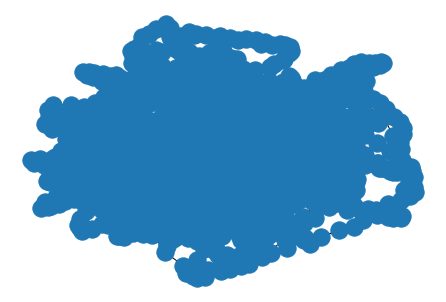

In [11]:
graph = rule_456(daily_sequences_list, H_tuple_list, A_tuple_list)
nx.draw(graph)

In [12]:
graph.number_of_edges(), graph.number_of_nodes()

(5197, 1998)

In [13]:
# random walk
import csrgraph as cg
import numpy as np

In [14]:
G = cg.csrgraph(graph, threads=12) 

node_names = G.names

In [15]:
walks = G.random_walks(walklen=10, # length of the walks
                epochs=100, # how many times to start a walk from each node
                start_nodes=None, # the starting node. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
                return_weight=1.,
                neighbor_weight=1.)


In [16]:
walks[0]

array([  0,   1, 722, 721,  86,  37,  38,  37,  86,  85], dtype=uint32)

In [17]:
node_names[0]

'{K8O6-Q0GC86VF-1536AAUT}'

In [18]:
graph.nodes['{K8O6-Q0GC86VF-1536AAUT}']

{'type': 'logon',
 'sub': 'ACJ1797',
 'obj': 'PC-2009',
 'A': 'Logon',
 'T': 1262390040.0,
 'H': 'PC-2009'}

In [20]:
for path in walks[:2]:
    print("-" * 20)
    for node_id in path:
        print(node_id)
        node_name = node_names[node_id]
        print(graph.nodes[node_name])


--------------------
0
{'type': 'logon', 'sub': 'ACJ1797', 'obj': 'PC-2009', 'A': 'Logon', 'T': 1262390040.0, 'H': 'PC-2009'}
1
{'type': 'logon', 'sub': 'AEG0962', 'obj': 'PC-9155', 'A': 'Logon', 'T': 1262388840.0, 'H': 'PC-9155'}
722
{'type': 'logon', 'sub': 'AEG0962', 'obj': 'PC-9155', 'A': 'Logon', 'T': 1262493764.0, 'H': 'PC-9155'}
721
{'type': 'logon', 'sub': 'ADR1156', 'obj': 'PC-2320', 'A': 'Logoff', 'T': 1262517000.0, 'H': 'PC-2320'}
86
{'type': 'logon', 'sub': 'ADR1156', 'obj': 'PC-2320', 'A': 'Logon', 'T': 1262475960.0, 'H': 'PC-2320'}
37
{'type': 'logon', 'sub': 'JBI1134', 'obj': 'PC-2320', 'A': 'Logon', 'T': 1262379352.0, 'H': 'PC-2320'}
38
{'type': 'logon', 'sub': 'JBI1134', 'obj': 'PC-2320', 'A': 'Logoff', 'T': 1262379748.0, 'H': 'PC-2320'}
37
{'type': 'logon', 'sub': 'JBI1134', 'obj': 'PC-2320', 'A': 'Logon', 'T': 1262379352.0, 'H': 'PC-2320'}
86
{'type': 'logon', 'sub': 'ADR1156', 'obj': 'PC-2320', 'A': 'Logon', 'T': 1262475960.0, 'H': 'PC-2320'}
85
{'type': 'logon', 's

In [26]:
len(walks)

199800

In [42]:
def skip_gram(walks, window_size=3):
    idx_pairs = []
    # for each sentence
    for indices in walks:
        # for each word, threated as center word
        for center_word_pos in range(indices.size):
            # for each window position
            for w in range(-window_size, window_size + 1):
                context_word_pos = center_word_pos + w
                # make soure not jump out sentence
                if context_word_pos < 0 or context_word_pos >= indices.size or center_word_pos == context_word_pos:
                    continue
                context_word_idx = indices[context_word_pos]
                idx_pairs.append((indices[center_word_pos], context_word_idx))

    # print(idx_pairs)
    return np.array(idx_pairs)

tmp = skip_gram(walks[:1])
tmp.shape

(48, 2)

In [47]:
def walks_to_file(walks):
    with open("../data/r_part/walks.txt", 'w') as file:
        for path in walks:
            path = list(path)
            path = [str(item) for item in path]
            file.write(",".join(path) + '\n')

walks_to_file(walks)

In [50]:
nx.write_edgelist(graph, "graph_edge_list")

In [51]:
nx.write_gpickle(graph, "graph.gpickle")

In [1]:
sorted_vertex_list[-1]

NameError: name 'sorted_vertex_list' is not defined

In [15]:
#     {G7V0-S4TP95SA-9203AOGR},01/02/2010 02:38:28,JBI1134,PC-0168,Logoff
import time
import datetime
timestamp = time.mktime(time.strptime("01/02/2010 02:38:28",'%m/%d/%Y %H:%M:%S'))
# (timestamp - timestamp).day
x = datetime.datetime.fromtimestamp(timestamp) - datetime.datetime.fromtimestamp(timestamp)
a = x.days


In [16]:
type(a)

int

In [19]:
x = 61.3
def calcu(x):
    x *= 10000
    print(x)
    shui = 0
    if x>=36000:
        shui += 36000*3*0.01
    else:
        shui += x*3*0.01
    if x>=144000:
        shui += (144000-36000)*10*0.01
    else:
        shui += (x-36000)*10*0.01
    if x>=300000:
        shui += (300000-144000)*20*0.01
    else:
        shui += (x - 144000) * 10 * 0.01
    if x>=420000:
        shui += (420000-300000)*25*0.01
    else:
        shui += (x - 300000) * 25 * 0.01
    if x>=660000:
        shui += (660000 - 420000) * 30 * 0.01
    else:
        shui += (x - 420000) * 30 * 0.01
    print(x-shui)

613000.0
482020.0
